## Final Project Submission

Please fill out:
* Student name: Mohammed Siddiqui
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Victor Geislinger
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_fin = pd.read_csv("tn.movie_budgets.csv")
df_title =pd.read_csv('title.basics.csv')
df_gross =pd.read_csv('bom.movie_gross.csv')
df_ratings =pd.read_csv('title.ratings.csv')

In [3]:
def dollar_to_int(column):
    df_fin[column] = df_fin[column].str.replace(',', '')
    df_fin[column] = df_fin[column].str.replace('$', '')
    df_fin[column] = df_fin[column].astype(np.int64)
    return df_fin

In [4]:
dollar_to_int('domestic_gross')
dollar_to_int('production_budget')
dollar_to_int('worldwide_gross')
df_fin['formatted_date'] = pd.to_datetime(df_fin['release_date'], format='%b %d, %Y')

In [5]:
df_gross['foreign_gross'] = df_gross['foreign_gross'].str.replace(',', '')
df_gross['foreign_gross'] = df_gross['foreign_gross'].astype(np.float64)
df_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [6]:
df_title.set_index("tconst", inplace=True)
df_ratings.set_index("tconst", inplace=True)

In [7]:
df_imdb = pd.merge(df_title, df_ratings,left_index=True, right_index=True, how='inner')
df_imdb.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [8]:
df_imdb.drop(['original_title'], axis=1, inplace= True)


In [9]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt0063540 to tt9916160
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    73856 non-null  object 
 1   start_year       73856 non-null  int64  
 2   runtime_minutes  66236 non-null  float64
 3   genres           73052 non-null  object 
 4   averagerating    73856 non-null  float64
 5   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 3.9+ MB


What are the smart people doing?,What are the dumb people doing?

In [10]:
df_fin =df_fin.drop(['id'], axis=1)
df_fin =df_fin.drop(['release_date'], axis=1)

In [11]:
df_fin= df_fin[df_fin['domestic_gross'] != 0]
df_fin= df_fin[df_fin['worldwide_gross'] != 0]
df_fin= df_fin[df_fin['production_budget'] >= 15000000]

In [13]:
df_imdb =df_imdb[df_imdb['numvotes'] > 500]

In [20]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13880 entries, tt0069049 to tt9905462
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    13880 non-null  object 
 1   start_year       13880 non-null  int64  
 2   runtime_minutes  13827 non-null  float64
 3   genres           13877 non-null  object 
 4   averagerating    13880 non-null  float64
 5   numvotes         13880 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 759.1+ KB


In [14]:
df_all = pd.merge(df_imdb, df_fin,left_on='primary_title', right_on='movie', how='inner')

In [41]:
df_all.describe()

,start_year,runtime_minutes,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross
count,1726.000000,1725.000000,1726.000000,1.726000e+03,1.726000e+03,1.726000e+03,1.726000e+03
mean,2013.789108,108.772754,6.382561,1.089298e+05,4.321704e+07,5.548671e+07,1.357842e+08
std,2.575383,17.707126,0.972809,1.592251e+05,5.372824e+07,8.256424e+07,2.250819e+08
min,2010.000000,63.000000,1.600000,5.010000e+02,9.000000e+03,3.880000e+02,5.280000e+02
25%,2012.000000,96.000000,5.800000,1.282325e+04,9.000000e+06,5.127296e+06,1.105868e+07
50%,2014.000000,106.000000,6.400000,5.366550e+04,2.275000e+07,2.786025e+07,5.095300e+07
75%,2016.000000,118.000000,7.100000,1.319620e+05,5.300000e+07,6.628876e+07,1.502684e+08
max,2019.000000,217.000000,9.000000,1.841066e+06,4.106000e+08,7.000596e+08,2.048134e+09


<AxesSubplot:xlabel='production_budget', ylabel='Count'>

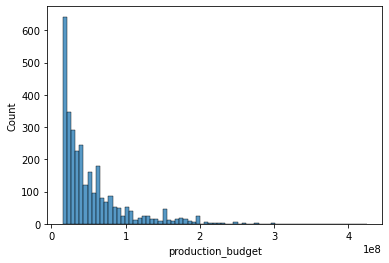

In [17]:
sns.histplot(df_fin['production_budget'])

In [16]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1097 entries, 0 to 1096
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   primary_title      1097 non-null   object        
 1   start_year         1097 non-null   int64         
 2   runtime_minutes    1096 non-null   float64       
 3   genres             1097 non-null   object        
 4   averagerating      1097 non-null   float64       
 5   numvotes           1097 non-null   int64         
 6   movie              1097 non-null   object        
 7   production_budget  1097 non-null   int64         
 8   domestic_gross     1097 non-null   int64         
 9   worldwide_gross    1097 non-null   int64         
 10  formatted_date     1097 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 142.8+ KB
